In [2]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info: str

In [3]:
def start_play(state: State) -> str:
    print("start play note has been called")
    return {"graph_info": state["graph_info"] + "I am going to play"}

def cricket(state: State) -> str:
    print("cricket node has been called")
    return {"graph_info": state["graph_info"] + " cricket"}

def badminton(state: State) -> str:
    print("badminton node has been called")
    return {"graph_info": state["graph_info"] + " badminton"}

In [4]:
import random
from typing import Literal

def random_play(state: State) -> Literal["cricket", "badminton"]:
    if random.random() > 0.5:
        return "cricket"
    else:
        return "badminton"

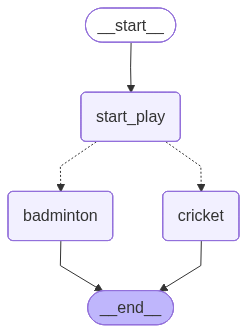

In [6]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

graph = StateGraph(State)

# add node
graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("badminton", badminton)

# schedule the flow of the graph
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket", END)
graph.add_edge("badminton", END)

# compile the graph
graph_builder = graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [8]:
graph_builder.invoke({"graph_info": "My name is yuhsuanting. "})

start play note has been called
cricket node has been called


{'graph_info': 'My name is yuhsuanting. I am going to play cricket'}